In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import os
from tqdm import tqdm
import cv2 as cv
from PIL import Image

%matplotlib inline

In [ ]:
from zipfile import ZipFile
file_name='/content/drive/MyDrive/Malarial Dataset/archive.zip'
with ZipFile(file_name,'r') as zip:
          zip.extractall()




In [ ]:
un="/content/cell_images/Uninfected"
print("no of uninfected images : ",len(os.listdir(un)))

no of uninfected images :  13780


In [ ]:
para="/content/cell_images/Parasitized"
print("no parasitized images : ",len(os.listdir(para)))

no parasitized images :  13780


In [ ]:
for image in tqdm(os.listdir(un)):
    if image!="Thumbs.db":
        img=cv.imread(os.path.join(un,image))
        print(img.shape)
        break

  0%|          | 0/13780 [00:00<?, ?it/s]

(115, 118, 3)


In [ ]:
unin=[]
for image in tqdm(os.listdir(un)):
    if image!="Thumbs.db":
        img=Image.open(os.path.join(un,image))
        img=img.resize((64,64))
        img=np.asarray(img)
        unin.append(img)

100%|██████████| 13780/13780 [00:16<00:00, 851.22it/s]


In [ ]:
print(len(unin))

13779


In [ ]:
print(len(unin[794]))
print(len(unin[7]))


64
64


In [ ]:
par=[]
for image in tqdm(os.listdir(para)):
    if image!="Thumbs.db":
        img=Image.open(os.path.join(para,image))
        img=img.resize((64,64))
        img=np.asarray(img)
        par.append(img)

100%|██████████| 13780/13780 [00:17<00:00, 804.77it/s]


In [ ]:
print(len(par))

13779


In [ ]:
ov_images=unin+par

In [ ]:
print(len(ov_images))

27558


In [ ]:
labels=([0]*(len(os.listdir(un))-1))+([1]*(len(os.listdir(para))-1))

In [ ]:
print(len(labels))

27558


In [ ]:
ov_images=np.array(ov_images)

In [ ]:
type(ov_images)

numpy.ndarray

In [ ]:
labels=np.array(labels)

In [ ]:
type(labels)

numpy.ndarray

In [ ]:
ov_images=ov_images/255

In [ ]:
from sklearn.utils import shuffle

In [ ]:
ov_images,labels=shuffle(ov_images,labels)

In [ ]:
labels[985]

1

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(ov_images,labels,test_size=0.2,stratify=y)


In [ ]:
print(x_train.shape,y_train.shape)

(22046, 64, 64, 3) (22046,)


In [ ]:
print(x_test.shape,y_test.shape)

(5512, 64, 64, 3) (5512,)


In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Dropout, Flatten
from keras import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping

In [ ]:
model = Sequential()

#adding convo-pool layers
model.add(Conv2D(filters=32, kernel_size=(3,3),input_shape=(64,64,3),activation='relu',padding="same"))
model.add(MaxPooling2D(pool_size=(2,2),strides=2))
model.add(Conv2D(filters=64, kernel_size=(3,3),input_shape=(64,64,3),activation='relu',padding="same"))
model.add(MaxPooling2D(pool_size=(2,2),strides=2))
model.add(Conv2D(filters=128, kernel_size=(3,3),input_shape=(64,64,3),activation='relu',padding="same"))
model.add(MaxPooling2D(pool_size=(2,2),strides=2))
model.add(Conv2D(filters=256, kernel_size=(3,3),input_shape=(64,64,3),activation='relu',padding="same"))
model.add(MaxPooling2D(pool_size=(2,2),strides=2))

# flattening image
model.add(Flatten())

# adding dense layers
model.add(Dense(128,activation='relu'))
# adding dropout to minimize overfitting issue
model.add(Dropout(0.2))
model.add(Dense(50,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1,activation='sigmoid'))

#compiling the model
model.compile(loss='binary_crossentropy',optimizer='adam' ,metrics=["accuracy"])

#summary of the model
model.summary()

In [ ]:
history=model.fit(x_train,y_train,verbose=1,epochs=5,validation_data=(x_test,y_test))

Epoch 1/5
689/689 [==============================] - 257s 373ms/step - loss: 0.1340 - accuracy: 0.9574 - val_loss: 0.1370 - val_accuracy: 0.9575
Epoch 2/5
689/689 [==============================] - 261s 379ms/step - loss: 0.1231 - accuracy: 0.9600 - val_loss: 0.1051 - val_accuracy: 0.9624
Epoch 3/5
689/689 [==============================] - 263s 381ms/step - loss: 0.1173 - accuracy: 0.9612 - val_loss: 0.1149 - val_accuracy: 0.9585
Epoch 4/5
689/689 [==============================] - 262s 381ms/step - loss: 0.1052 - accuracy: 0.9634 - val_loss: 0.1099 - val_accuracy: 0.9641
Epoch 5/5
689/689 [==============================] - 261s 379ms/step - loss: 0.0986 - accuracy: 0.9669 - val_loss: 0.1044 - val_accuracy: 0.9641


In [ ]:
yhat=model.predict_classes(x_test)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:455: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [ ]:
from sklearn.metrics import precision_score, recall_score, accuracy_score, confusion_matrix,f1_score

In [ ]:
precision_score(y_test,yhat)

0.9736936936936937

In [ ]:
recall_score(y_test,yhat)

0.9688060236643958

In [ ]:
f1_score(y_test,yhat)

0.9712437095614666

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

[[2650   87]
 [  73 2702]]


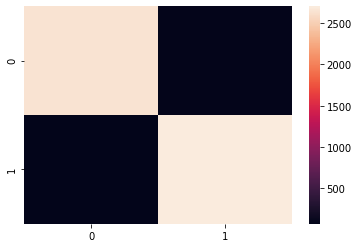

In [ ]:
from sklearn.metrics import confusion_matrix
cf_matrix=confusion_matrix(yhat,y_test)
print(cf_matrix)
sns.heatmap(cf_matrix)